## run this cell before starting spark cluster connection (corrects module error)

In [14]:
import os
print os.environ['PYSPARK_PYTHON']
os.environ['PYSPARK_PYTHON']=os.environ['LCG_VIEW'] + '/bin/python'
print os.environ['PYSPARK_PYTHON']

/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/bin/python
/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/bin/python


### Import necessary spark and python stuff

In [15]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.functions import from_json
from pyspark.ml.feature import VectorAssembler

In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### select the data

In [17]:
df = spark.read.json("/user/sprenner/training_official_mai_hourly_proportion_prefetching.json")

In [18]:
df.createOrReplaceTempView("mai")

In [19]:
pd.set_option("display.max_rows",1900)
pd.set_option("display.max_colwidth", -1)

In [20]:
time_series = spark.sql("SELECT DISTINCT CONCAT(fileScope, ':', filename) AS did, hour, hits\
            FROM mai \
            WHERE eventType=='download' AND clientState != 'ALREADY_DONE' AND dataset != 'None' AND dataset != '' AND dataset != '[null]' AND account != 'pilot' AND (dataset LIKE 'data%' OR dataset LIKE 'mc%')\
            ORDER BY hour ASC")

time_series_pd = time_series.toPandas()

In [21]:
time_series_pd

did           hour  \
0       data17_13TeV:DAOD_EXOT8.13457277._000012.pool.root.1    2018-05-01 00   
1       data17_13TeV:DAOD_EXOT8.13457361._000278.pool.root.1    2018-05-01 00   
2       mc16_13TeV:DAOD_SUSY5.13555633._000154.pool.root.1      2018-05-01 00   
3       data17_13TeV:DAOD_EXOT8.13457657._000004.pool.root.1    2018-05-01 00   
4       data17_13TeV:DAOD_EXOT8.13457657._000009.pool.root.1    2018-05-01 00   
5       data17_13TeV:DAOD_EXOT8.13457653._000314.pool.root.1    2018-05-01 00   
6       mc16_13TeV:DAOD_SUSY5.13555633._000168.pool.root.1      2018-05-01 00   
7       mc16_13TeV:DAOD_SUSY5.13555633._000179.pool.root.1      2018-05-01 00   
8       mc16_13TeV:DAOD_SUSY5.13555633._000165.pool.root.1      2018-05-01 00   
9       data17_13TeV:DAOD_EXOT8.13457657._000002.pool.root.1    2018-05-01 00   
10      data17_13TeV:DAOD_EXOT8.13457520._000009.pool.root.1    2018-05-01 00   
11      data17_13TeV:DAOD_EXOT8.13457361._000268.pool.root.1    2018-05-01 00   
12      data17_13TeV:DAOD_EXOT8.13457779._000069.pool.root.1    2018-05-01 00   
13      data17_13TeV:DAOD_EXOT8.13457657._000011.pool.root.1    2018-05-01 00   
14      mc16_13TeV:AOD.12911516._000009.pool.root.1             2018-05-01 00   
15      data17_13TeV:DAOD_EXOT8.13457426._000106.pool.root.1    2018-05-01 00   
16      mc16_13TeV:DAOD_SUSY5.13555633._000143.pool.root.1      2018-05-01 00   
17      data17_13TeV:DAOD_EXOT8.13457096._000124.pool.root.1    2018-05-01 00   
18      data17_13TeV:DAOD_EXOT8.13457520._000007.pool.root.1    2018-05-01 00   
19      mc16_13TeV:DAOD_SUSY5.13555633._000148.pool.root.1      2018-05-01 00   
20      mc16_13TeV:DAOD_SUSY5.13555633._000134.pool.root.1      2018-05-01 00   
21      mc16_13TeV:DAOD_SUSY5.13555633._000126.pool.root.1      2018-05-01 00   
22      data17_13TeV:DAOD_EXOT8.13457096._000121.pool.root.1    2018-05-01 00   
23      mc15_13TeV:AOD.09347582._000033.pool.root.1             2018-05-01 00   
24      data17_13TeV:DAOD_EXOT8.13457361._000280.pool.root.1    2018-05-01 00   
25      mc16_13TeV:NTUP_PILEUP.12913252._000003.pool.root.1     2018-05-01 00   
26      data17_13TeV:DAOD_EXOT8.13457361._000270.pool.root.1    2018-05-01 00   
27      data17_13TeV:DAOD_EXOT8.13457361._000269.pool.root.1    2018-05-01 00   
28      mc16_13TeV:DAOD_SUSY5.13555633._000176.pool.root.1      2018-05-01 00   
29      data17_13TeV:DAOD_EXOT8.13457426._000118.pool.root.1    2018-05-01 00   
30      mc16_13TeV:DAOD_SUSY5.13555633._000169.pool.root.1      2018-05-01 00   
31      mc16_13TeV:DAOD_SUSY5.13555633._000172.pool.root.1      2018-05-01 00   
32      data17_13TeV:DAOD_EXOT8.13457653._000306.pool.root.1    2018-05-01 00   
33      mc16_13TeV:NTUP_PILEUP.12913252._000009.pool.root.1     2018-05-01 00   
34      data17_13TeV:DAOD_EXOT8.13457520._000088.pool.root.1    2018-05-01 00   
35      data17_13TeV:DAOD_EXOT8.13457520._000008.pool.root.1    2018-05-01 00   
36      data17_13TeV:DAOD_EXOT8.13457277._000014.pool.root.1    2018-05-01 00   
37      data17_13TeV:DAOD_EXOT8.13457361._000271.pool.root.1    2018-05-01 00   
38      mc16_13TeV:DAOD_SUSY5.13555633._000149.pool.root.1      2018-05-01 00   
39      data17_13TeV:DAOD_EXOT8.13457096._000128.pool.root.1    2018-05-01 00   
40      mc16_13TeV:DAOD_SUSY5.13555633._000133.pool.root.1      2018-05-01 00   
41      data17_13TeV:DAOD_EXOT8.13457361._000272.pool.root.1    2018-05-01 00   
42      data17_13TeV:DAOD_EXOT8.13457096._000132.pool.root.1    2018-05-01 00   
43      data17_13TeV:DAOD_EXOT8.13457653._000307.pool.root.1    2018-05-01 00   
44      data17_13TeV:DAOD_EXOT8.13457653._000329.pool.root.1    2018-05-01 00   
45      data17_13TeV:DAOD_EXOT8.13457779._000070.pool.root.1    2018-05-01 00   
46      data17_13TeV:DAOD_EXOT8.13457096._000119.pool.root.1    2018-05-01 00   
47      data17_13TeV:DAOD_EXOT8.13457277._000013.pool.root.1    2018-05-01 00   
48      mc16_13TeV:DAOD_SUSY5.13555633._000142.pool.root.1      2018-05-01 00   
49      m

In [22]:
time_series.createOrReplaceTempView("time_series")
spark.sql("SELECT DISTINCT did, SUM(hits) AS sum_hits\
            FROM time_series \
            GROUP BY did \
            ORDER BY sum_hits DESC").toPandas()

did  \
0       mc16_13TeV:AOD.12911492._000017.pool.root.1                                                                
1       mc16_13TeV:AOD.12911492._000016.pool.root.1                                                                
2       mc16_13TeV:AOD.12911492._000019.pool.root.1                                                                
3       mc16_13TeV:AOD.12911492._000022.pool.root.1                                                                
4       mc16_13TeV:AOD.12911492._000023.pool.root.1                                                                
5       mc16_13TeV:AOD.12911492._000018.pool.root.1                                                                
6       mc16_13TeV:AOD.12911492._000020.pool.root.1                                                                
7       mc16_13TeV:DAOD_JETM5.13995233._000241.pool.root.1                                                         
8       mc16_13TeV:DAOD_JETM5.13995233._000240.pool.root.1                                                         
9       mc16_13TeV:DAOD_JETM5.13995233._000238.pool.root.1                                                         
10      mc16_13TeV:DAOD_JETM5.13995233._000242.pool.root.1                                                         
11      mc16_13TeV:AOD.12911492._000024.pool.root.1                                                                
12      mc16_13TeV:AOD.12911492._000021.pool.root.1                                                                
13      mc16_13TeV:AOD.12911540._000011.pool.root.1                                                                
14      mc16_13TeV:DAOD_JETM5.13995233._000244.pool.root.1                                                         
15      mc16_13TeV:DAOD_JETM5.13995233._000246.pool.root.1                                                         
16      mc16_13TeV:DAOD_JETM5.13995233._000245.pool.root.1                                                         
17      mc16_13TeV:DAOD_JETM5.13995233._000239.pool.root.1                                                         
18      mc16_13TeV:DAOD_JETM5.13995233._000243.pool.root.1                                                         
19      mc16_13TeV:AOD.12975610._000012.pool.root.1                                                                
20      mc16_13TeV:DAOD_JETM5.13995233._000247.pool.root.1                                                         
21      mc16_13TeV:AOD.12911540._000013.pool.root.1                                                                
22      mc16_13TeV:AOD.12911540._000012.pool.root.1                                                                
23      mc16_13TeV:DAOD_JETM5.13995233._000258.pool.root.1                                                         
24      mc16_13TeV:DAOD_JETM5.13995233._000248.pool.root.1                                                         
25      mc16_13TeV:DAOD_JETM5.13995233._000260.pool.root.1                                                         
26      mc16_13TeV:DAOD_JETM5.13995233._000250.pool.root.1                                                         
27      mc16_13TeV:DAOD_JETM5.13995233._000254.pool.root.1                                                         
28      mc16_13TeV:DAOD_JETM5.13995233._000251.pool.root.1                                                         
29      mc16_13TeV:DAOD_JETM5.13995233._000255.pool.root.1                                                         
30      mc16_13TeV:EVNT.13150121._000001.pool.root.1                                                               
31      mc16_13TeV:DAOD_JETM5.13995233._000199.pool.root.1                                                         
32      mc16_13TeV:DAOD_JETM5.13995233._000232.pool.root.1                                                         
33      mc16_13TeV:AOD.12911540._000014.pool.root.1                                                                
34      mc16_13TeV:AOD.12911540._000020.pool.root

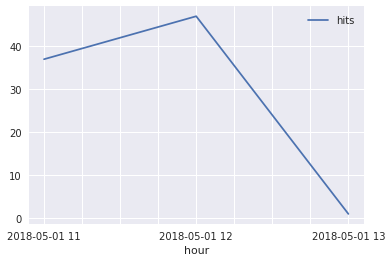

In [24]:
top1 = spark.sql("SELECT *\
            FROM time_series \
            WHERE did == 'mc16_13TeV:AOD.12911492._000017.pool.root.1' \
            ORDER BY hour ASC").toPandas()
top1.plot(x='hour', y='hits')

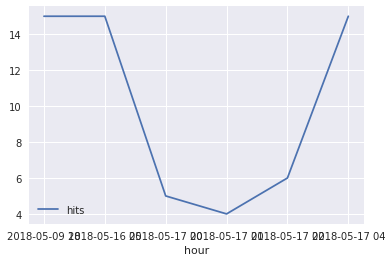

In [25]:
top2 = spark.sql("SELECT *\
            FROM time_series \
            WHERE did == 'mc16_13TeV:DAOD_JETM5.13995233._000241.pool.root.1' \
            ORDER BY hour ASC").toPandas()
top2.plot(x='hour', y='hits')

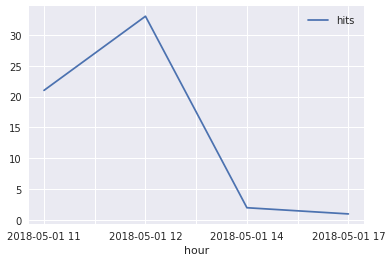

In [26]:
top3 = spark.sql("SELECT *\
            FROM time_series \
            WHERE did == 'mc16_13TeV:AOD.12911540._000011.pool.root.1' \
            ORDER BY hour ASC").toPandas()
top3.plot(x='hour', y='hits')

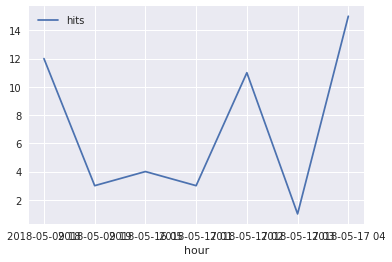

In [27]:
top4 = spark.sql("SELECT *\
            FROM time_series \
            WHERE did == 'mc16_13TeV:DAOD_JETM5.13995233._000244.pool.root.1' \
            ORDER BY hour ASC").toPandas()
top4.plot(x='hour', y='hits')

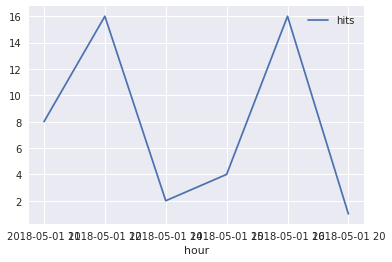

In [28]:
top5 = spark.sql("SELECT *\
            FROM time_series \
            WHERE did == 'mc16_13TeV:AOD.12975610._000012.pool.root.1' \
            ORDER BY hour ASC").toPandas()
top5.plot(x='hour', y='hits')

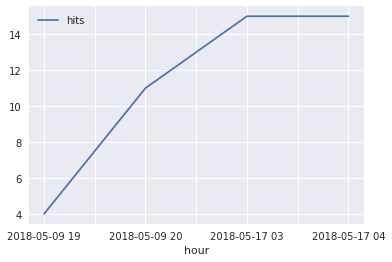

In [29]:
top6 = spark.sql("SELECT *\
            FROM time_series \
            WHERE did == 'mc16_13TeV:DAOD_JETM5.13995233._000258.pool.root.1' \
            ORDER BY hour ASC").toPandas()
top6.plot(x='hour', y='hits')

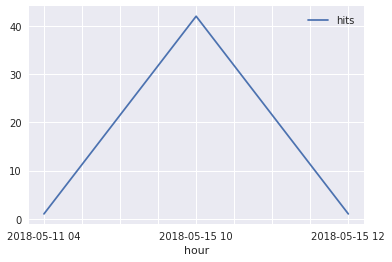

In [30]:
top7 = spark.sql("SELECT *\
            FROM time_series \
            WHERE did == 'mc16_13TeV:EVNT.13150121._000001.pool.root.1' \
            ORDER BY hour ASC").toPandas()
top7.plot(x='hour', y='hits')

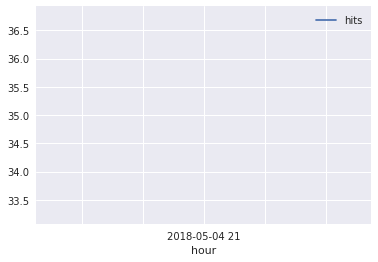

In [31]:
top8 = spark.sql("SELECT *\
            FROM time_series \
            WHERE did == 'mc16_13TeV:AOD.13513769._000039.pool.root.1' \
            ORDER BY hour ASC").toPandas()
top8.plot(x='hour', y='hits')

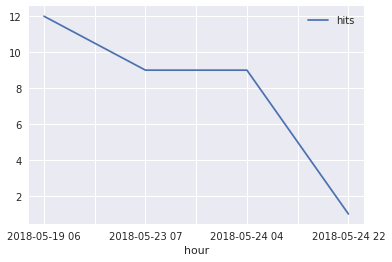

In [32]:
top9 = spark.sql("SELECT *\
            FROM time_series \
            WHERE did == 'data16_13TeV:DAOD_EXOT8.13467587._000440.pool.root.1' \
            ORDER BY hour ASC").toPandas()
top9.plot(x='hour', y='hits')

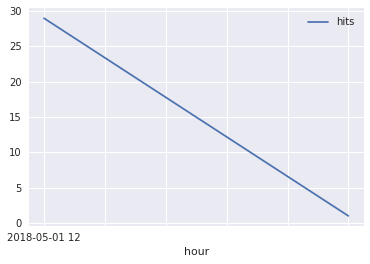

In [34]:
top10 = spark.sql("SELECT *\
            FROM time_series \
            WHERE did == 'mc16_13TeV:AOD.12911516._000043.pool.root.1' \
            ORDER BY hour ASC").toPandas()
top10.plot(x='hour', y='hits')

In [35]:
spark.sql("SELECT hits, COUNT(*)\
            FROM time_series \
            GROUP BY hits\
            ORDER BY hits ASC").toPandas()

hits  count(1)
0   1     296608  
1   2     54071   
2   3     9971    
3   4     10373   
4   5     3765    
5   6     4399    
6   7     2391    
7   8     1347    
8   9     1041    
9   10    826     
10  11    588     
11  12    162     
12  13    221     
13  14    187     
14  15    75      
15  16    133     
16  17    15      
17  18    31      
18  19    8       
19  20    27      
20  21    59      
21  22    3       
22  23    3       
23  24    12      
24  25    3       
25  26    1       
26  27    3       
27  28    13      
28  29    3       
29  30    6       
30  31    9       
31  32    9       
32  33    1       
33  34    1       
34  35    7       
35  37    4       
36  42    2       
37  46    1       
38  47    1       
39  51    1       
40  53    1       
41  56    1       
42  57    1       
43  62    1       
44  74    2